In [2]:
import numpy as np

categories_21 = ['chair', 'table', 'picture', 'cabinet', 'cushion', 'sofa',
'bed', 'chest_of_drawers', 'plant', 'sink', 'toilet', 'stool',
'towel', 'tv_monitor', 'shower', 'bathtub', 'counter', 'fireplace', 'gym_equipment', 'seating', 'clothes']
# categories_21.append('heater')
# categories_21.append('window')
# categories_21.append('treadmill')
# categories_21.append('exercise machine')

rooms = ['bedroom', 'living room', 'bathroom', 'kitchen', 'dining room', 'office room', 'gym', 'lounge', 'laundry room']

co_occur_mtx = np.load('tools/obj.npy')
co_occur_mtx -= co_occur_mtx.min()
co_occur_mtx /= co_occur_mtx.max() 

co_occur_room_mtx = np.load('tools/room.npy')
co_occur_room_mtx -= co_occur_room_mtx.min()
co_occur_room_mtx /= co_occur_room_mtx.max()

In [5]:
co_occur_room_mtx.shape

(21, 9)

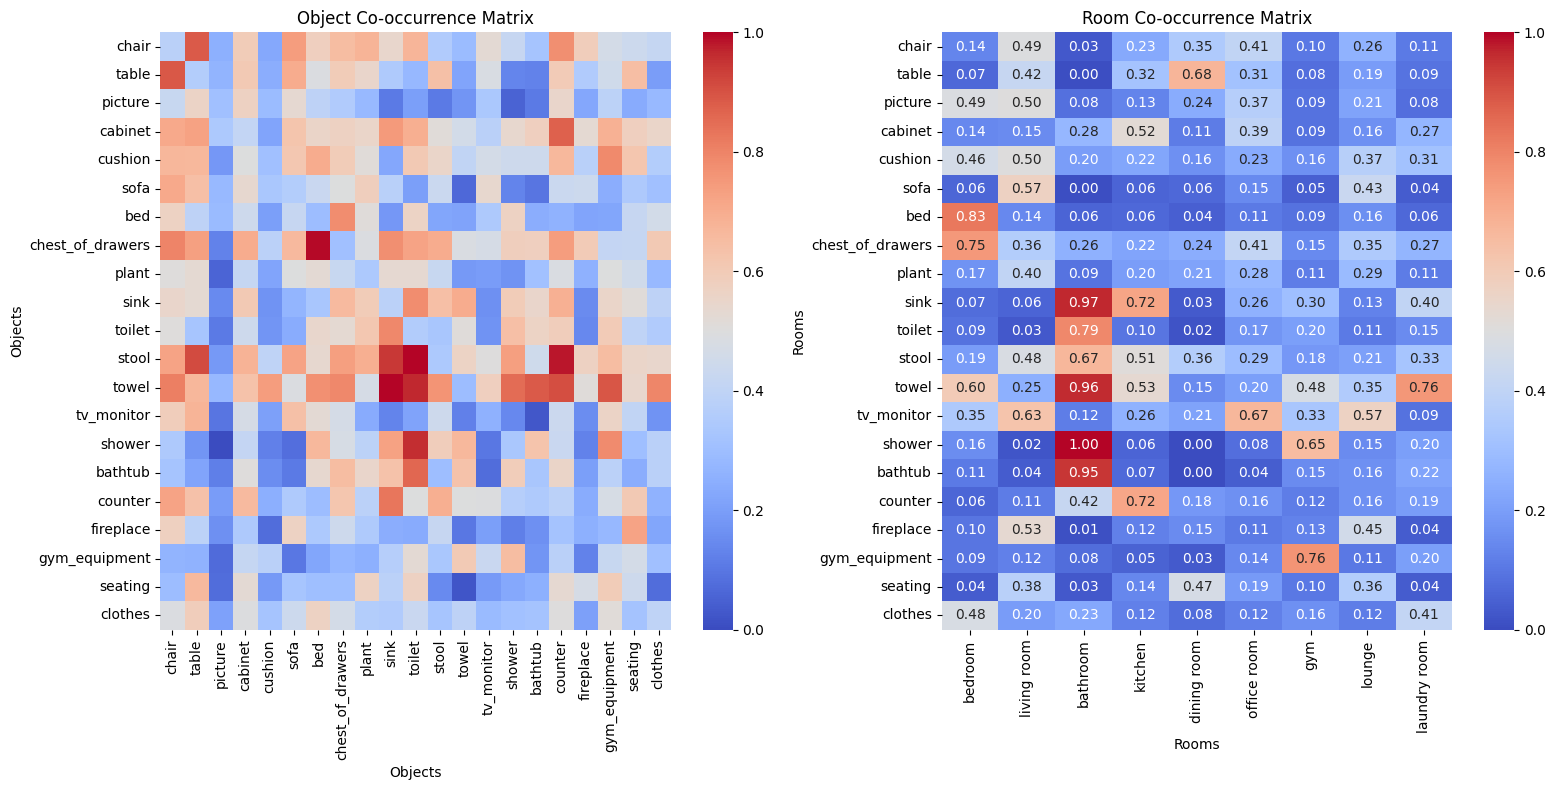

In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Visualization of the matrices
fig, axes = plt.subplots(1, 2, figsize=(16, 8))

# Object Co-occurrence Matrix
sns.heatmap(
    co_occur_mtx, 
    ax=axes[0], 
    annot=False, 
    fmt=".2f", 
    cmap="coolwarm", 
    cbar=True, 
    xticklabels=categories_21, 
    yticklabels=categories_21
)
axes[0].set_title("Object Co-occurrence Matrix")
axes[0].set_xlabel("Objects")
axes[0].set_ylabel("Objects")

# Room Co-occurrence Matrix
sns.heatmap(
    co_occur_room_mtx, 
    ax=axes[1], 
    annot=True, 
    fmt=".2f", 
    cmap="coolwarm", 
    cbar=True, 
    xticklabels=rooms, 
    yticklabels=categories_21
)
axes[1].set_title("Room Co-occurrence Matrix")
axes[1].set_xlabel("Rooms")
axes[1].set_ylabel("Rooms")

plt.tight_layout()
plt.show()



In [5]:
print(co_occur_mtx[0,8])
print(co_occur_mtx[8,0])

0.6767962964638599
0.5074401269765689


In [7]:
co_occur_mtx.sum(axis=1)

array([10.80742252,  9.17669075,  6.48506238, 11.84412152, 10.69781884,
        7.98624106,  7.81380764, 12.2943724 ,  7.84860939,  9.96658349,
        8.93603904, 13.43274033, 14.63138247,  6.95308159,  8.6896866 ,
        8.34689913,  9.80890454,  6.52529326,  7.02249043,  7.16242493,
        8.27422976])

In [10]:
co_occur_room_mtx.sum(axis=0)

array([5.43892594, 6.39308807, 7.21518317, 5.36042816, 3.79052707,
       5.10002052, 4.48302326, 5.29624418, 4.36031802])

In [11]:
co_occur_room_mtx.sum(axis=1)

array([2.11396842, 2.16314256, 2.19314061, 2.11789201, 2.62871255,
       1.41542835, 1.5497689 , 3.0033043 , 1.86832749, 2.94297453,
       1.65623966, 3.22453907, 4.29006616, 3.22367693, 2.31987693,
       1.72511162, 2.11807547, 1.63543575, 1.58876274, 1.74396757,
       1.91534676])

In [1]:
from constants import categories_21
corr_matrix_obj_llm = np.load('tools/obj.npy')
corr_matrix_obj_llm -= corr_matrix_obj_llm.min()
corr_matrix_obj_llm /= corr_matrix_obj_llm.max()
def get_correlation(obj_label, target_label):
    if obj_label == target_label:
        return 1
    elif obj_label in categories_21 and target_label in categories_21:
        return corr_matrix_obj_llm[categories_21.index(obj_label), categories_21.index(target_label)]
    else:
        return 0
print(get_correlation('chair', 'chair'))
print(get_correlation('chair', 'sofa'))
print(get_correlation('chair', 'toilet'))
print(get_correlation('chair', 'towel'))



NameError: name 'np' is not defined